<a href="https://colab.research.google.com/github/pilatova/prot-viz-data/blob/test/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/pilatova/prot-viz-data/test/dist2.tsv"

dist = pd.read_csv(
    url,
    sep='\t',           # Tab separator for TSV files
    header=0,           # Use the first row as headers
    index_col=0         # Set the first column ("protein_id") as the index
)

dist.head()

,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,
A0A087WTH1,0.029031,0.154998,0.110481,0.196955,0.344118,0.144013,0.109375,0.232052,0.385447,0.138486,0.217262,0.389459,0.192162,0.368851,0.437878
A0A087WZ39,0.103670,0.377518,0.391924,0.578767,0.941801,0.453725,0.498146,0.613333,1.076725,0.406620,0.474470,0.844741,0.525629,0.926316,1.071503
A0A096LP49,0.160867,0.640212,0.633581,0.685461,2.314668,0.667860,0.642229,0.718148,2.226590,0.552318,0.822833,2.328829,0.775940,2.277628,2.473843
A0A0U1RRA0,0.016778,0.143482,0.109374,0.167911,0.544500,0.162434,0.128345,0.148527,0.536199,0.088828,0.183459,0.661912,0.089641,0.556196,0.551611
A0A126GWI2,0.061848,0.209570,0.176613,0.199606,0.276475,0.206727,0.171825,0.195499,0.269331,0.161940,0.212899,0.259762,0.185132,0.232008,0.252956


# Basic Data Analysis

In [8]:
# ----------------------
# Basic Data Checks
# ----------------------

# 1. Check for missing values
print("Missing values per column:")
display(dist.isnull().sum())

Missing values per column:


,0
human-baboon,0
human-cow,0
human-dog,0
human-mouse,0
human-opossum,0
baboon-cow,0
baboon-dog,0
baboon-mouse,0
baboon-opossum,0
cow-dog,0


In [9]:
# 2. Check data types
print("\nData types:")
display(dist.dtypes)


Data types:


,0
human-baboon,float64
human-cow,float64
human-dog,float64
human-mouse,float64
human-opossum,float64
baboon-cow,float64
baboon-dog,float64
baboon-mouse,float64
baboon-opossum,float64
cow-dog,float64


In [10]:
# 3. Check numeric ranges (all values should be ≥0)
print("\nValue ranges:")
display(dist.describe())

# 4. Check for negative values (invalid for evolutionary distances)
negative_values = (dist < 0).any().any()
print(f"\nNegative values present? {negative_values}")
print(f"\nRows containing negative values:")
display(dist[(dist < 0).any(axis=1)])

# 5. Check index uniqueness (protein IDs should be unique)
print(f"\nUnique protein IDs? {dist.index.is_unique}")

# 6. Check row/column counts
print(f"\nData shape: {dist.shape} (rows x columns)")


Value ranges:


,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
count,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,0.038371,0.129671,0.123888,0.157870,0.285568,0.141524,0.136908,0.169082,0.298808,0.128206,0.181186,0.299077,0.177722,0.298182,0.317740
std,0.069828,0.129352,0.126829,0.151269,0.255520,0.147679,0.145475,0.165937,0.269832,0.137560,0.175120,0.270225,0.171631,0.269237,0.283339
min,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
25%,0.007703,0.039578,0.035247,0.050334,0.106068,0.042353,0.038079,0.053803,0.110398,0.036623,0.060013,0.112329,0.057302,0.109887,0.119171
50%,0.021100,0.093775,0.086753,0.115104,0.217127,0.100083,0.093993,0.123015,0.226544,0.089081,0.132645,0.226797,0.128331,0.225156,0.240622
75%,0.044115,0.178594,0.170889,0.216131,0.388530,0.191132,0.185404,0.230148,0.404606,0.173875,0.246042,0.404820,0.243342,0.403100,0.428582
max,1.797991,2.155932,1.328868,1.683248,2.782719,2.441345,2.040214,3.030621,3.452648,2.477352,2.735270,3.005446,1.830683,3.079467,3.075986



Negative values present? False

Rows containing negative values:


,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,



Unique protein IDs? True

Data shape: (13020, 15) (rows x columns)


In [11]:
# Check for unreasonably large distances (e.g., >10)
max_value = dist.max().max()
print(f"Maximum distance value: {max_value}")

# Check for zeros (if they should not exist between species)
zero_values = (dist == 0).any().any()
print(f"Zero values present? {zero_values}")

Maximum distance value: 3.452648
Zero values present? False


In [12]:
print(f"\nDrop row with negative value:")
dist.drop(dist[(dist < 0).any(axis=1)].index, inplace=True)
display(dist[(dist < 0).any(axis=1)])


Drop row with negative value:


,human-baboon,human-cow,human-dog,human-mouse,human-opossum,baboon-cow,baboon-dog,baboon-mouse,baboon-opossum,cow-dog,cow-mouse,cow-opossum,dog-mouse,dog-opossum,mouse-opossum
protein_id,,,,,,,,,,,,,,,


In [13]:
dist.to_csv('dist3.tsv', sep = '\t', encoding='utf-8', index=True)

# Estimating Speed of Mutation

In [20]:
# weights (median time) sourced from https://timetree.org/
weights = {
    'human-baboon': 28.8,
    'human-cow': 94,
    'human-dog': 94,
    'human-mouse': 87,
    'human-opossum': 160,
    'baboon-cow': 94,
    'baboon-dog': 94,
    'baboon-mouse': 87,
    'baboon-opossum': 160,
    'cow-dog': 76,
    'cow-mouse': 94,
    'cow-opossum': 160,
    'dog-mouse': 94,
    'dog-opossum': 160,
    'mouse-opossum': 160
}

distance_cols = dist.columns[1:]
weight_values = [weights[col] for col in distance_cols]
normalized = dist[distance_cols].div(weight_values)

means = dist.mean(axis=1)
medians = dist.mean(axis=1)
human_means = dist.iloc[:, :5].mean(axis=1)
human_medians = dist.iloc[:, :5].median(axis=1)
normalized_means = normalized.mean(axis=1)

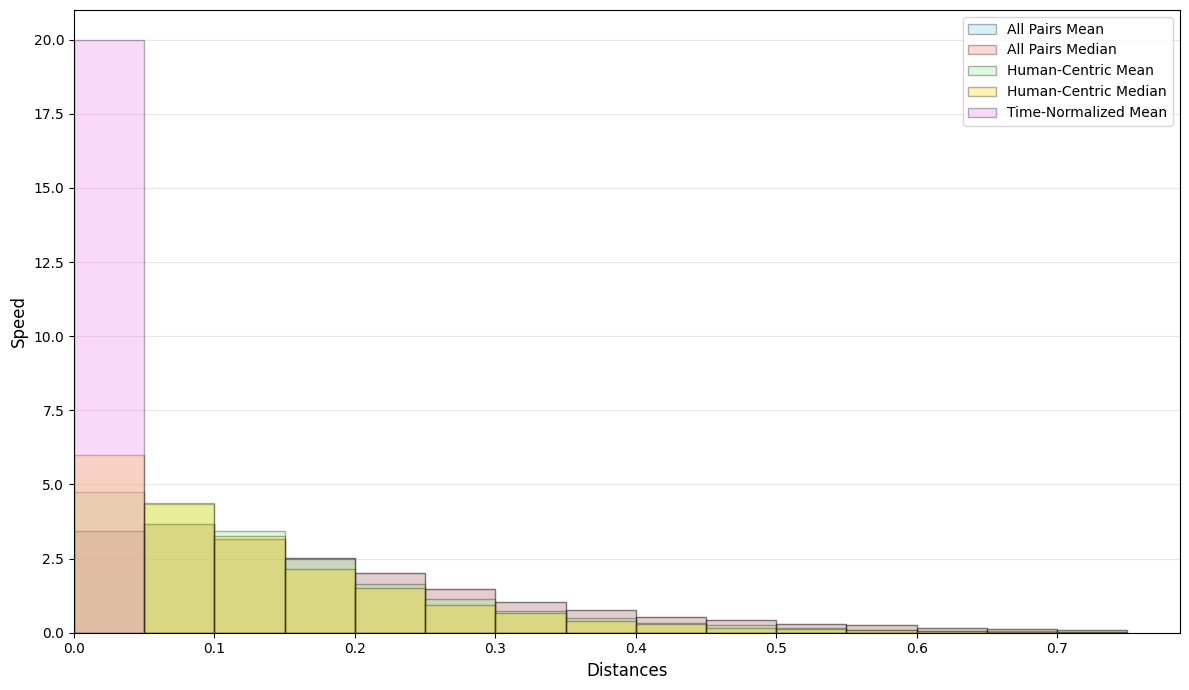

Metric Summary Statistics:

Means:
count    13021.000000
mean         0.192274
std          0.167460
min          0.000010
25%          0.071563
50%          0.147492
75%          0.262809
max          1.791390
dtype: float64

Medians:
count    13021.000000
mean         0.192274
std          0.167460
min          0.000010
25%          0.071563
50%          0.147492
75%          0.262809
max          1.791390
dtype: float64

Human Means:
count    13021.000000
mean         0.147092
std          0.129831
min          0.000010
25%          0.052883
50%          0.112668
75%          0.201541
max          1.288477
dtype: float64

Human Medians:
count    13021.000000
mean         0.129908
std          0.124153
min          0.000010
25%          0.040485
50%          0.095273
75%          0.181049
max          1.368631
dtype: float64

Normalized Means:
count    1.302100e+04
mean     1.735461e-03
std      1.526738e-03
min      9.373299e-08
25%      6.343146e-04
50%      1.329217e-03
75%      2

In [32]:
metrics = {
    'means': means,
    'medians': medians,
    'human_means': human_means,
    'human_medians': human_medians,
    'normalized_means': normalized_means,
}

plt.figure(figsize=(12, 7))
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet']
labels = [
    'All Pairs Mean',
    'All Pairs Median',
    'Human-Centric Mean',
    'Human-Centric Median',
    'Time-Normalized Mean'
]

all_values = np.concatenate(list(metrics.values()))
# bins = np.histogram_bin_edges(all_values, bins=50)
bins = [x/100 for x in range(0, 76, 5)]

# Plot histograms
for (name, values), color, label in zip(metrics.items(), colors, labels):
    plt.hist(values, bins=bins, alpha=0.3,
             color=color, edgecolor='black',
             label=label, density=True)

plt.xlabel('Distances', fontsize=12)
plt.ylabel('Speed', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.gca().set_axisbelow(True)
plt.xlim(left=0)  # Start x-axis at 0 for better comparison

plt.tight_layout()
plt.show()

# Show metrics summary
print("Metric Summary Statistics:")
for name, values in metrics.items():
    print(f"\n{name.replace('_', ' ').title()}:")
    print(values.describe())

<Axes: xlabel='value', ylabel='Count'>

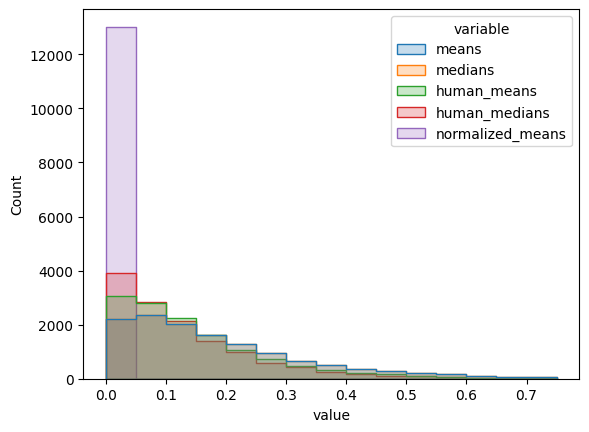

In [44]:
xy = pd.DataFrame(metrics)
xyz = xy.reset_index().drop(columns=['protein_id'])
ab = xyz.melt()

sns.histplot(data=ab, x='value', hue='variable', bins=bins, element='step')

<Axes: xlabel='value', ylabel='Probability'>

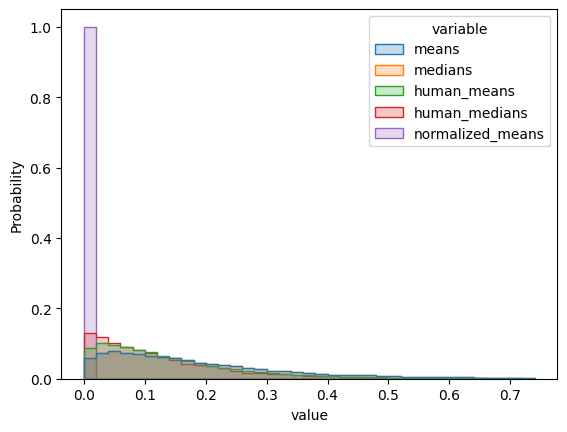

In [64]:
bins = [x/100 for x in range(0, 76, 2)]

sns.histplot(data=ab, x='value', hue='variable', bins=bins, element='step', stat='probability', common_norm=False)

Zdá sa, že normalized_means dáva veľmi veľa proteínom veľmi nízku rýchlosť mutácie, zatiaľ čo means dáva

,0
protein_id,
A0A087WTH1,0.154041
A0A087WZ39,0.414528
A0A096LP49,0.799835
A0A0U1RRA0,0.182488
A0A126GWI2,0.137187
...,...
Q9Y6Y8,0.091264
Q9Y6Y9,0.371389
Q9Y6Z7,0.093688


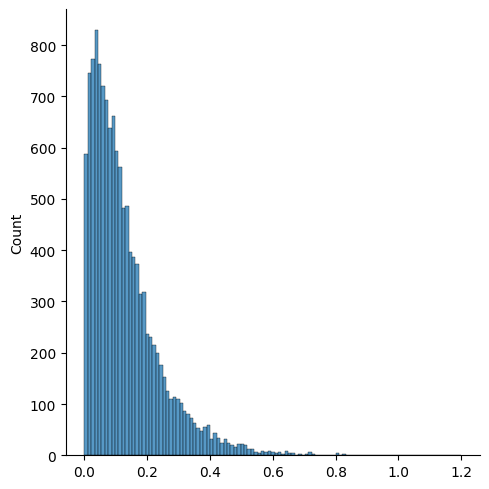

In [68]:
mean_mean = xy[['means', 'medians', 'normalized_means']].mean(axis=1)
sns.displot(mean_mean)